In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv('diamond_preprocessed.csv')

In [209]:
df.describe()

,carat,table,price,x,y,z,cut_ideal,cut_premium,color_d,color_e,color_h,color_i,color_j,clarity_i1,clarity_si2,clarity_vvs1,clarity_vvs2
count,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000
mean,0.699048,57.256777,3007.790400,5.542272,5.532940,3.416351,0.430434,0.252975,0.131548,0.188433,0.146954,0.092368,0.047191,0.010619,0.160749,0.075018,0.100901
std,0.357532,1.993270,2522.595298,0.946838,0.953289,0.592709,0.495143,0.434722,0.338002,0.391062,0.354065,0.289548,0.212050,0.102499,0.367304,0.263423,0.301201
min,0.200000,52.000000,326.000000,3.730000,3.680000,1.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,56.000000,882.000000,4.670000,4.650000,2.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.610000,57.000000,2121.000000,5.590000,5.450000,3.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.010000,59.000000,4493.000000,6.380000,6.390000,3.960000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,63.500000,10702.000000,8.580000,8.500000,5.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


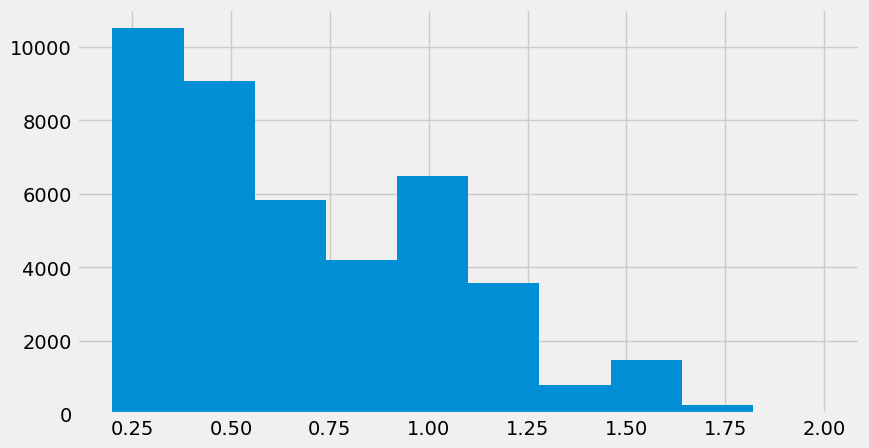

In [212]:
plt.figure(figsize=(9,5))
plt.hist(df["carat"])
plt.show()

In [213]:
df.shape

(42190, 17)

In [215]:

X = df.drop(columns=["carat"])
Y = df["carat"]
splitRatio = int(len(X)*0.8)
X_train ,X_test= X[:splitRatio] , X[splitRatio:]
y_train , y_test = Y[:splitRatio], Y[splitRatio:]

In [216]:
print(f"Shape of the dataset after splitting: \nX-Train: {X_train.shape} \nX-Test: {X_test.shape} \nY-Train: {y_train.shape} \nY-Test: {y_test.shape}")

Shape of the dataset after splitting: 
X-Train: (33752, 16) 
X-Test: (8438, 16) 
Y-Train: (33752,) 
Y-Test: (8438,)


In [217]:
class LinearRegression():
    def MSE(self,y_actuals,y_pred):
        return np.mean((y_actuals-y_pred)**2)
    def predict(self,w,X):
        return np.dot(X,w)
    def OLS(self):
        pass
    def calculateWeight(self,X,y):
        XTX = np.dot(X.T,X)
        XTX_INV = np.linalg.inv(XTX)
        w = np.dot(np.dot(XTX_INV,X.T),y)
        return w


In [218]:
model = LinearRegression()
weights = model.calculateWeight(X_train,y_train)
y_pred = model.predict(weights,X_test)
mse = model.MSE(y_test,y_pred)
print(f"Mean squared error: {mse:0.2f}")

Mean squared error for test data: 0.00


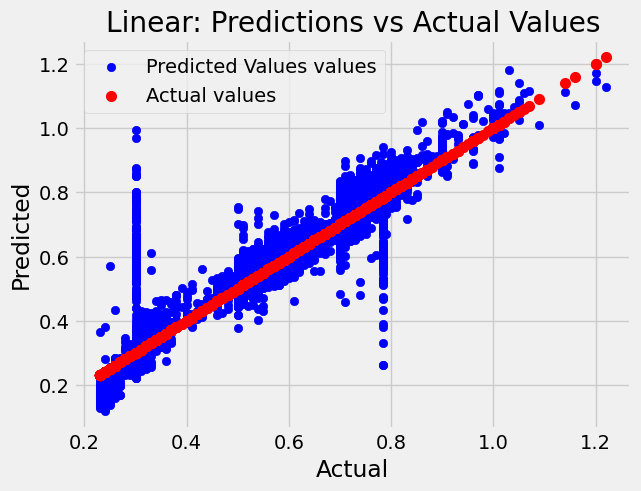

In [225]:
plt.scatter(y_test, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test, y_test, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()